"I  certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I  did not receive any external help, coaching or contributions during the production of this work."

~Mohd Anas Qureshi


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df =pd.read_csv('./insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['sex'] = df['sex'].astype('category')

In [ ]:
df['smoker'] = df['smoker'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 55.2+ KB


In [ ]:
df['sex'] = df['sex'].cat.codes

In [ ]:
df['smoker'] = df['smoker'].cat.codes

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df.drop(columns='region',inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
train_data = df.sample(frac=0.8,random_state=30)
test_data = df.drop(train_data.index)

In [ ]:
train_data.shape

(1070, 6)

In [ ]:
test_data.shape

(268, 6)

In [ ]:
X_train = np.array(train_data[['age','sex','bmi','children','smoker']])

In [ ]:
y_train = np.array(train_data[['charges']])

In [ ]:
X_train.shape

(1070, 5)

In [ ]:
y_train.shape

(1070, 1)

In [ ]:
X_test = np.array(test_data[['age','sex','bmi','children','smoker']])

In [ ]:
y_test = np.array(test_data[['charges']])

In [ ]:
X_test.shape

(268, 5)

In [ ]:
y_test.shape

(268, 1)

In [ ]:
class LinearRegression():
  def __init__(self):
    self.weights = None


  
  def loss(self,x,y):
    z = np.dot(x,self.weights)
    #h = self.compute(z)
    delta = y - z
    j = (1/2)*(np.dot(delta.T,delta))
    return j

  def ols(self,x,y):
    self.weights = np.dot(np.dot(np.linalg.inv(np.dot((x).T, (x))), x.T), y)
    return self.weights

  def predict(self,x,w,y):
    z = np.dot(x,w)
    #pred = self.compute(z)
    n = x.shape[0]
    sum = 0
    for i in range(n):
      error = y[i] - z[i]
      sq_error = (error)**2
      sum += sq_error

    mse = sum/n

    return z, mse


  

model = LinearRegression()
w = model.ols(X_train,y_train)
loss = model.loss(X_train,y_train)
print('loss:',loss)
print('weight vector:',w)
l = model.loss(X_train,y_train)
p,mse = model.predict(X_test,w,y_test)
#print(len(p))
print('mean squared error: ',mse)

loss: [[2.13624234e+10]]
weight vector: [[  190.37251789]
 [ -704.31666012]
 [   46.97520231]
 [  196.17816797]
 [23383.37755855]]
mean squared error:  [45888569.10722986]


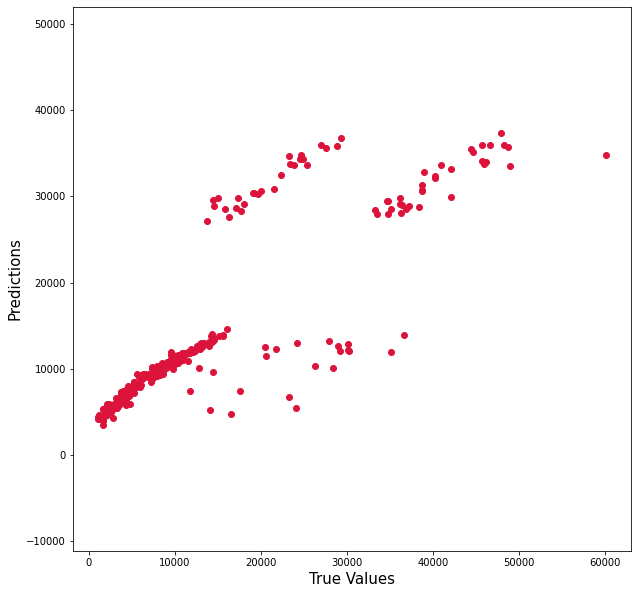

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, p, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()